建立起資料集
轉換為DataFrame
       feature1  feature2  target
0      1.082336 -0.735616       0
1      0.233988 -2.362111       0
2      1.250030  0.426958       0
3      0.324143 -0.366499       0
4     -0.719809 -0.954703       0
...         ...       ...     ...
99995  1.561394  0.050433       1
99996 -0.468958  1.724035       1
99997  0.184817  0.017760       1
99998  0.200910  1.079955       1
99999  0.664452 -0.084943       1

[100000 rows x 3 columns]
查看資料之間的比例
target
0    98474
1     1526
Name: count, dtype: int64
查看資料之間的比例
target
0    0.98474
1    0.01526
Name: proportion, dtype: float64


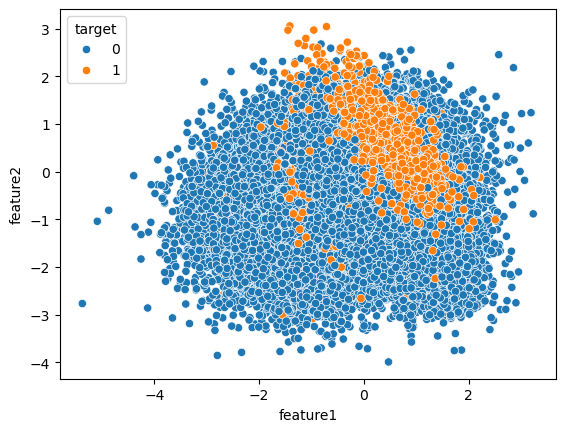

In [11]:
# !pip install imbalanced-learn
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#分類不平衡的模組
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

print('建立起資料集')
X,y=make_classification(n_samples=100000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,class_sep=0.6,weights=[0.99,0.01],random_state=0,shuffle=False)
print('轉換為DataFrame')
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
print(df)
print('查看資料之間的比例')
print(df['target'].value_counts())
print('查看資料之間的比例')
print(df['target'].value_counts(normalize=True))
sns.scatterplot(x='feature1',y='feature2',hue='target',data=df)
plt.show()

In [6]:
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.neighbors import KNeighborsClassifier #KNN
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
from sklearn.metrics import accuracy_score #準確率
from sklearn.metrics import classification_report #分類報告
from sklearn.metrics import confusion_matrix #混淆矩陣

需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


In [7]:
#1、X與y資料準備

#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

訓練的準確率:
 0.9848857142857143
測試的準確率:
 0.9853666666666666
測試的分類報告:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29561
           1       0.50      0.02      0.04       439

    accuracy                           0.99     30000
   macro avg       0.74      0.51      0.52     30000
weighted avg       0.98      0.99      0.98     30000

測試的混淆矩陣:
 [[29552     9]
 [  430     9]]


既然分類數量不平衡，追求兩個數量的平衡
1.過採樣：增加少數類樣本的數量
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
2.欠採樣：減少多數類樣本的數量
from imblearn.under_sampling import RandomUnderSampler,NearMiss
3.一定要只選擇增加或減少嗎?
from imblearn.combine import SMOTEENN,SMOTETomek
SMOTEENN：先增加少數類樣本數量，再刪除邊界上的模糊樣本
SMOTETomek：先增加少數類樣本數量，再刪除兩類重疊區域的資料

查看轉換後的資料分布


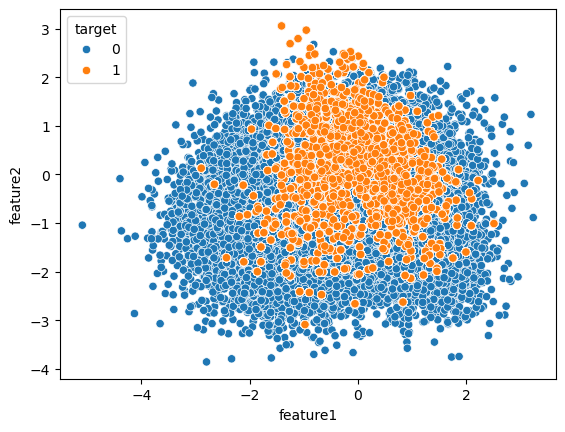

查看資料之間的比例
target
0    68938
1    68938
Name: count, dtype: int64
查看資料之間的比例
target
0    0.5
1    0.5
Name: proportion, dtype: float64
訓練的準確率:
 0.9732223157039659
測試的準確率:
 0.9246
測試的分類報告:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     29536
           1       0.05      0.21      0.08       464

    accuracy                           0.92     30000
   macro avg       0.52      0.57      0.52     30000
weighted avg       0.97      0.92      0.95     30000



In [13]:
# 導入所需的不平衡學習工具
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek

#1、X與y資料準備

#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#2-1、產生分類不平衡物件 
ros=RandomOverSampler(random_state=0)
rus=RandomUnderSampler(random_state=0)
smote=SMOTE(random_state=0)
smoteenn=SMOTEENN(random_state=0)
smotetomek=SMOTETomek(random_state=0)
nearmiss1=NearMiss(version=1)
nearmiss2=NearMiss(version=2)
nearmiss3=NearMiss(version=3)
#2-2、依據分類不平衡物件進行訓練資料的轉換
X_resampled1,y_resampled1=ros.fit_resample(x_train,y_train)
#X_resampled2,y_resampled2=rus.fit_resample(x_train,y_train)
#2-3、轉換後的資料儲存至DataFrame
df1=pd.DataFrame({'feature1':X_resampled1[:,0],'feature2':X_resampled1[:,1],'target':y_resampled1})
print('查看轉換後的資料分布')
sns.scatterplot(x='feature1',y='feature2',hue='target',data=df1)
plt.show()
print('查看資料之間的比例')
print(df1['target'].value_counts())
print('查看資料之間的比例')
print(df1['target'].value_counts(normalize=True))
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
#得做調整
model1.fit(X_resampled1,y_resampled1)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(X_resampled1) #訓練 調整
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_resampled1,y_predict2)) #調整
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))


查看轉換後的資料分布


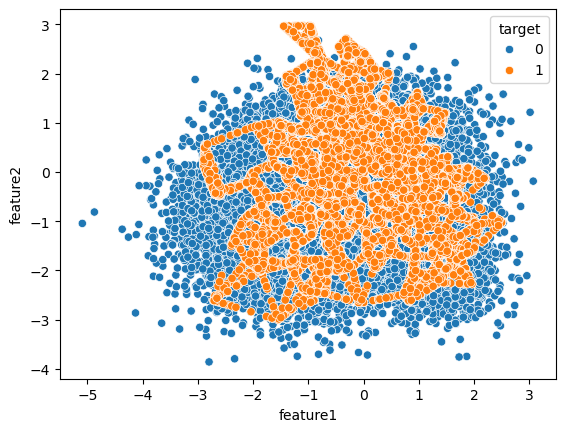

查看資料之間的比例
target
0    68921
1    68921
Name: count, dtype: int64
查看資料之間的比例
target
0    0.5
1    0.5
Name: proportion, dtype: float64
訓練的準確率:
 0.8709682099795418
測試的準確率:
 0.8026333333333333
測試的分類報告:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     29553
           1       0.03      0.38      0.05       447

    accuracy                           0.80     30000
   macro avg       0.51      0.59      0.47     30000
weighted avg       0.97      0.80      0.88     30000

測試的混淆矩陣:
 [[23909  5644]
 [  277   170]]


In [14]:
#1、X與y資料準備

#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#2-1、產生分類不平衡物件 
ros=RandomOverSampler(random_state=0)
rus=RandomUnderSampler(random_state=0)
smote=SMOTE(random_state=0)
smoteenn=SMOTEENN(random_state=0)
smotetomek=SMOTETomek(random_state=0)
nearmiss1=NearMiss(version=1)
nearmiss2=NearMiss(version=2)
nearmiss3=NearMiss(version=3)
#2-2、依據分類不平衡物件進行訓練資料的轉換 SMOTE(random_state=0)
X_resampled1,y_resampled1=smote.fit_resample(x_train,y_train)
#X_resampled2,y_resampled2=rus.fit_resample(x_train,y_train)
#2-3、轉換後的資料儲存至DataFrame
df1=pd.DataFrame({'feature1':X_resampled1[:,0],'feature2':X_resampled1[:,1],'target':y_resampled1})
print('查看轉換後的資料分布')
sns.scatterplot(x='feature1',y='feature2',hue='target',data=df1)
plt.show()
print('查看資料之間的比例')
print(df1['target'].value_counts())
print('查看資料之間的比例')
print(df1['target'].value_counts(normalize=True))
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
#得做調整
model1.fit(X_resampled1,y_resampled1)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(X_resampled1) #訓練 調整
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_resampled1,y_predict2)) #調整
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))

查看轉換後的資料分布


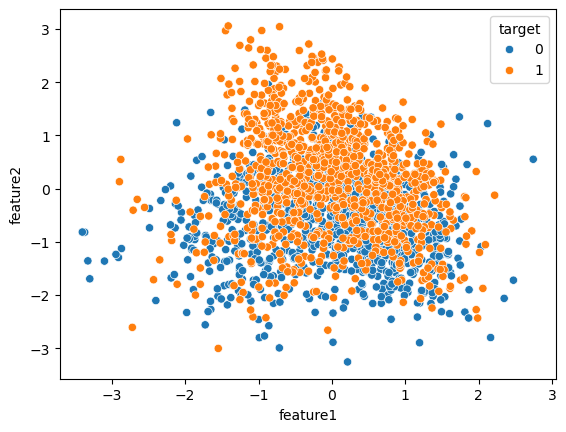

查看資料之間的比例
target
0    1065
1    1065
Name: count, dtype: int64
查看資料之間的比例
target
0    0.5
1    0.5
Name: proportion, dtype: float64
訓練的準確率:
 0.7136150234741784
測試的準確率:
 0.7707333333333334
測試的分類報告:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87     29539
           1       0.03      0.50      0.06       461

    accuracy                           0.77     30000
   macro avg       0.51      0.64      0.47     30000
weighted avg       0.98      0.77      0.86     30000

測試的混淆矩陣:
 [[22892  6647]
 [  231   230]]


In [15]:
#1、X與y資料準備

#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#2-1、產生分類不平衡物件 
ros=RandomOverSampler(random_state=0)
rus=RandomUnderSampler(random_state=0)
smote=SMOTE(random_state=0)
smoteenn=SMOTEENN(random_state=0)
smotetomek=SMOTETomek(random_state=0)
nearmiss1=NearMiss(version=1)
nearmiss2=NearMiss(version=2)
nearmiss3=NearMiss(version=3)
#2-2、依據分類不平衡物件進行訓練資料的轉換 RandomUnderSampler
X_resampled1,y_resampled1=rus.fit_resample(x_train,y_train)
#X_resampled2,y_resampled2=rus.fit_resample(x_train,y_train)
#2-3、轉換後的資料儲存至DataFrame
df1=pd.DataFrame({'feature1':X_resampled1[:,0],'feature2':X_resampled1[:,1],'target':y_resampled1})
print('查看轉換後的資料分布')
sns.scatterplot(x='feature1',y='feature2',hue='target',data=df1)
plt.show()
print('查看資料之間的比例')
print(df1['target'].value_counts())
print('查看資料之間的比例')
print(df1['target'].value_counts(normalize=True))
#3、產生模型物件
model1=KNeighborsClassifier(n_neighbors=10)
#4、模型物件進行訓練
#得做調整
model1.fit(X_resampled1,y_resampled1)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(X_resampled1) #訓練 調整
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_resampled1,y_predict2)) #調整
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))